In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from src.imports import *

In [4]:
DATA_PATH = Path('data/')
TRAIN_PATH = DATA_PATH/'train/'
TMP_PATH = DATA_PATH/'tmp/'
TEST_PATH = DATA_PATH/'test/'
list(DATA_PATH.iterdir())

[PosixPath('data/stage_1_train_labels.csv'),
 PosixPath('data/tmp'),
 PosixPath('data/test'),
 PosixPath('data/stage_1_sample_submission.csv'),
 PosixPath('data/train'),
 PosixPath('data/stage_1_detailed_class_info.csv')]

In [23]:
labels = pd.read_csv(DATA_PATH/'stage_1_detailed_class_info.csv')
labels.columns = ['patientId', 'type']
print(labels.shape)
labels.head()

(28989, 2)


,patientId,type
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [24]:
print(f'Total no of rows in the above dataframe : {labels.shape[0]}')
print(f'TOtal no of unique patients are : {labels.patientId.nunique()}')
print(f'No of patients by class:  ')
for i,v in labels.type.value_counts().items():
    print(f'\t{i}: {v}')

Total no of rows in the above dataframe : 28989
TOtal no of unique patients are : 25684
No of patients by class:  
	No Lung Opacity / Not Normal: 11500
	Lung Opacity: 8964
	Normal: 8525


In [55]:
train_labels = pd.read_csv(DATA_PATH/'stage_1_train_labels.csv')
print(train_labels.shape)
train_labels.head()

(28989, 6)


,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [27]:
print(f'Total no of rows in the above dataframe : {train_labels.shape[0]}')
print(f'TOtal no of unique patients are : {train_labels.patientId.nunique()}')
print(f'No of patients by Target:  ')
for i,v in train_labels.Target.value_counts().items():
    print(f'\t{i}: {v}')

Total no of rows in the above dataframe : 28989
TOtal no of unique patients are : 25684
No of patients by Target:  
	0: 20025
	1: 8964


In [56]:
train_labels = train_labels.fillna(0)
train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [57]:
train_labels['bb'] = train_labels[['Target', 'x', 'y', 'width', 'height']].values.tolist()
train_labels = train_labels.drop(['Target', 'x', 'y', 'width', 'height'], axis=1)
train_labels.head()

,patientId,bb
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,"[0.0, 0.0, 0.0, 0.0, 0.0]"
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,"[0.0, 0.0, 0.0, 0.0, 0.0]"
2,00322d4d-1c29-4943-afc9-b6754be640eb,"[0.0, 0.0, 0.0, 0.0, 0.0]"
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,"[0.0, 0.0, 0.0, 0.0, 0.0]"
4,00436515-870c-4b36-a041-de91049b9ab4,"[1.0, 264.0, 152.0, 213.0, 379.0]"


In [58]:
x = train_labels.groupby(by = 'patientId')['bb'].apply(list)

In [59]:
image_bbox = x.to_frame().reset_index()
print(image_bbox.shape)
image_bbox.head()

(25684, 2)


,patientId,bb
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,"[[0.0, 0.0, 0.0, 0.0, 0.0]]"
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,"[[0.0, 0.0, 0.0, 0.0, 0.0]]"
2,00322d4d-1c29-4943-afc9-b6754be640eb,"[[0.0, 0.0, 0.0, 0.0, 0.0]]"
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,"[[0.0, 0.0, 0.0, 0.0, 0.0]]"
4,00436515-870c-4b36-a041-de91049b9ab4,"[[1.0, 264.0, 152.0, 213.0, 379.0], [1.0, 562...."


In [60]:
image_bbox.to_csv(TMP_PATH/'train_labels_cleaned.csv')

In [5]:
f = open(TMP_PATH/'train_labels_cleaned.csv')
lines = f.readlines()

In [6]:
line = lines[1]
line

'0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,"[[0.0, 0.0, 0.0, 0.0, 0.0]]"\n'

In [69]:
splitted = line.split('\"')
splitted

['0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,',
 '[[0.0, 0.0, 0.0, 0.0, 0.0]]',
 '\n']

In [70]:
ast.literal_eval(splitted[1])

[[0.0, 0.0, 0.0, 0.0, 0.0]]

In [45]:
int(label[0])

0

In [8]:
pId = '0004cfab-14fd-4e49-80ba-63a80b6bddd6'+'.dcm'

In [9]:
pd = pydicom.read_file(f'data/train/{pId}')

In [10]:
im = pd.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


In [108]:
torch.FloatTensor(im)

tensor([[144., 128., 114.,  ..., 176., 184., 117.],
        [125., 109.,  95.,  ..., 171., 178., 111.],
        [104.,  89.,  75.,  ..., 166., 175., 108.],
        ...,
        [ 16.,  14.,  11.,  ...,  19.,  15.,   3.],
        [ 18.,  16.,  12.,  ...,  21.,  17.,   5.],
        [ 19.,  17.,  13.,  ...,  23.,  19.,   6.]])

(-0.5, 999.5, 999.5, -0.5)

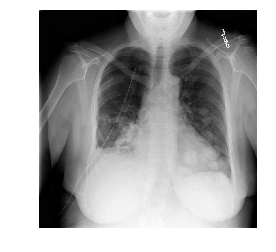

In [28]:
plt.imshow(im[:1000,:1000], cmap=plt.cm.gist_gray)
plt.axis('off')


In [12]:
from torchvision import transforms

In [19]:
import cv2

In [22]:
x = cv2.resize(im, (200,200))

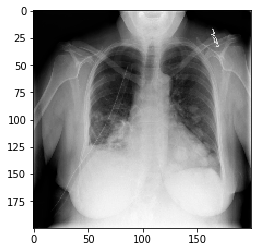

In [24]:
plt.imshow(x, cmap=plt.cm.gist_gray)

In [29]:
from PIL import Image

In [41]:
xy = Image.fromarray(x[:100,:]).convert('RGB')

In [42]:
xy.size

(200, 100)